**بسم الله الرحمن الرحيم**

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None


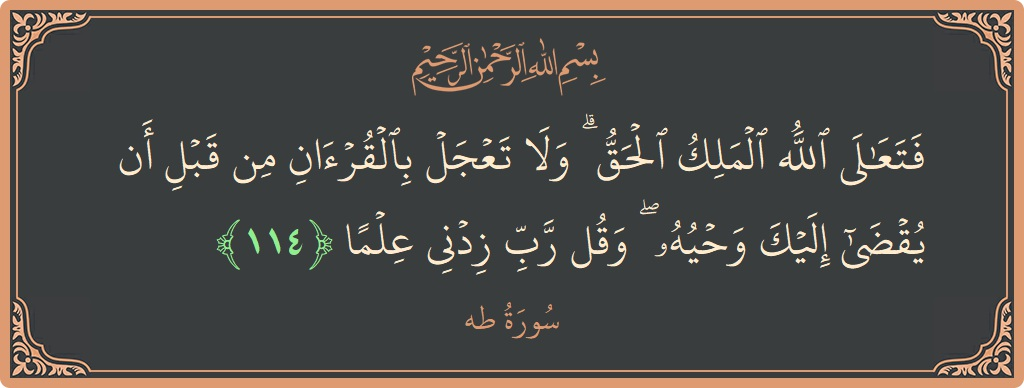

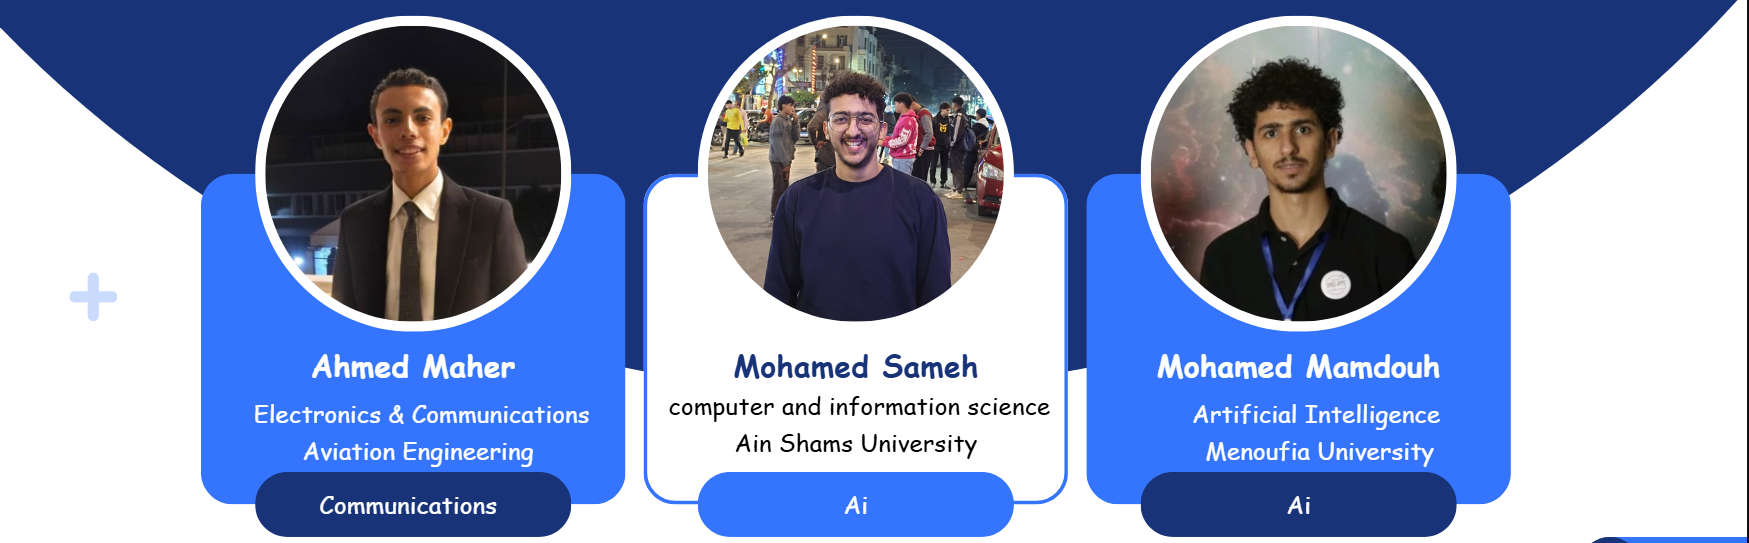

In [74]:
df = pd.read_csv('health_markers_dataset.csv')

# **About Dataset**

This dataset contains **medical diagnostic test results** used to predict an individual's health condition.  
The main goal is to build a **classification model** that can identify potential diseases  
based on **9 key biomarkers**.

---

##  **Features (Input Variables)**
The dataset includes the following medical test results:

- **Blood Glucose** → Measures the level of sugar in the blood.  
- **HbA1C** → Indicator of long-term blood glucose levels (3-month average).  
- **Systolic BP** → Systolic blood pressure (upper value).  
- **Diastolic BP** → Diastolic blood pressure (lower value).  
- **LDL** → Low-Density Lipoprotein (bad cholesterol).  
- **HDL** → High-Density Lipoprotein (good cholesterol).  
- **Triglycerides** → Type of fat (lipid) found in the blood.  
- **Haemoglobin** → Measures the oxygen-carrying capacity of red blood cells.  
- **MCV (Mean Corpuscular Volume)** → Average size of red blood cells.  

---

##  **Target Variable (Health Condition)**
The model aims to classify individuals into one of the following categories:

- **Fit** → No major health issues.  
- **Anemia** → Low haemoglobin or red blood cell count.  
- **Hypertension** → High blood pressure condition.  
- **Diabetes** → High blood glucose and HbA1C levels.  
- **High Cholesterol** → Elevated LDL and triglycerides.  

---

##  **Use Cases**
- **Health Risk Prediction** → Estimate the likelihood of common diseases.  
- **Preventive Healthcare** → Early detection of health risks.  
- **Medical Decision Support** → Assisting doctors in preliminary diagnosis.  
- **AI in Healthcare** → Insurance risk assessment and personalized healthcare.  

---

##  **Suggested Machine Learning Approaches**
- **Classification Algorithms:** Decision Trees, Random Forest, SVM, Naïve Bayes.  
- **Feature Engineering:** Normalize numerical features for better model performance.  
- **Model Evaluation:** Use Accuracy, Precision, Recall, and F1-Score for reliable evaluation.  

---


# **📂Data OverView**

In [75]:
df.head()

,Blood_glucose,HbA1C,Systolic_BP,Diastolic_BP,LDL,HDL,Triglycerides,Haemoglobin,MCV,Condition
0,107.38,4.93,109.25,74.10,129.20,52.11,68.84,10.17,61.54,Anemia
1,108.65,5.43,92.61,62.02,51.18,44.06,78.82,12.29,91.04,Fit
2,103.95,6.08,122.95,63.01,107.72,52.08,139.58,15.93,81.75,Fit
3,87.33,4.79,91.16,75.81,109.39,46.83,108.29,15.18,85.51,Fit
4,114.42,4.10,122.86,76.11,123.89,52.92,123.22,15.33,92.30,Fit


In [76]:
df.shape

(25000, 10)

In [77]:
df.columns

Index(['Blood_glucose', 'HbA1C', 'Systolic_BP', 'Diastolic_BP', 'LDL', 'HDL',
       'Triglycerides', 'Haemoglobin', 'MCV', 'Condition'],
      dtype='object')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Blood_glucose  24838 non-null  float64
 1   HbA1C          24838 non-null  float64
 2   Systolic_BP    24838 non-null  float64
 3   Diastolic_BP   24838 non-null  float64
 4   LDL            24838 non-null  float64
 5   HDL            24838 non-null  float64
 6   Triglycerides  24838 non-null  float64
 7   Haemoglobin    24838 non-null  float64
 8   MCV            24838 non-null  float64
 9   Condition      25000 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.9+ MB


In [79]:
df.isnull().sum()

Blood_glucose    162
HbA1C            162
Systolic_BP      162
Diastolic_BP     162
LDL              162
HDL              162
Triglycerides    162
Haemoglobin      162
MCV              162
Condition          0
dtype: int64

In [80]:
df.duplicated().sum()

0

In [81]:
print('Unique : ',df.Condition.unique())
print('------------------------------')
print('Number Of Unique : ' , df.Condition.nunique())
print('------------------------------')
print('Value_Counts : ')
print(df.Condition.value_counts())
print('------------------------------')

Unique :  ['Anemia' 'Fit' 'Hypertension' 'Diabetes' 'High_Cholesterol']
------------------------------
Number Of Unique :  5
------------------------------
Value_Counts : 
Condition
Fit                 18000
Diabetes             3052
Hypertension         1757
High_Cholesterol     1323
Anemia                868
Name: count, dtype: int64
------------------------------




---



# **👀Clean Data**

In [82]:
df.dropna(inplace =True)

In [83]:
df.columns = df.columns.str.lower()

In [84]:
df.columns

Index(['blood_glucose', 'hba1c', 'systolic_bp', 'diastolic_bp', 'ldl', 'hdl',
       'triglycerides', 'haemoglobin', 'mcv', 'condition'],
      dtype='object')

In [85]:
df.head()

,blood_glucose,hba1c,systolic_bp,diastolic_bp,ldl,hdl,triglycerides,haemoglobin,mcv,condition
0,107.38,4.93,109.25,74.10,129.20,52.11,68.84,10.17,61.54,Anemia
1,108.65,5.43,92.61,62.02,51.18,44.06,78.82,12.29,91.04,Fit
2,103.95,6.08,122.95,63.01,107.72,52.08,139.58,15.93,81.75,Fit
3,87.33,4.79,91.16,75.81,109.39,46.83,108.29,15.18,85.51,Fit
4,114.42,4.10,122.86,76.11,123.89,52.92,123.22,15.33,92.30,Fit




---



# **📊EDA**

 - Distribution
 - Descriptive Statistics
 - Bivariate & Multivariate Analysis

## **➡Distribution**

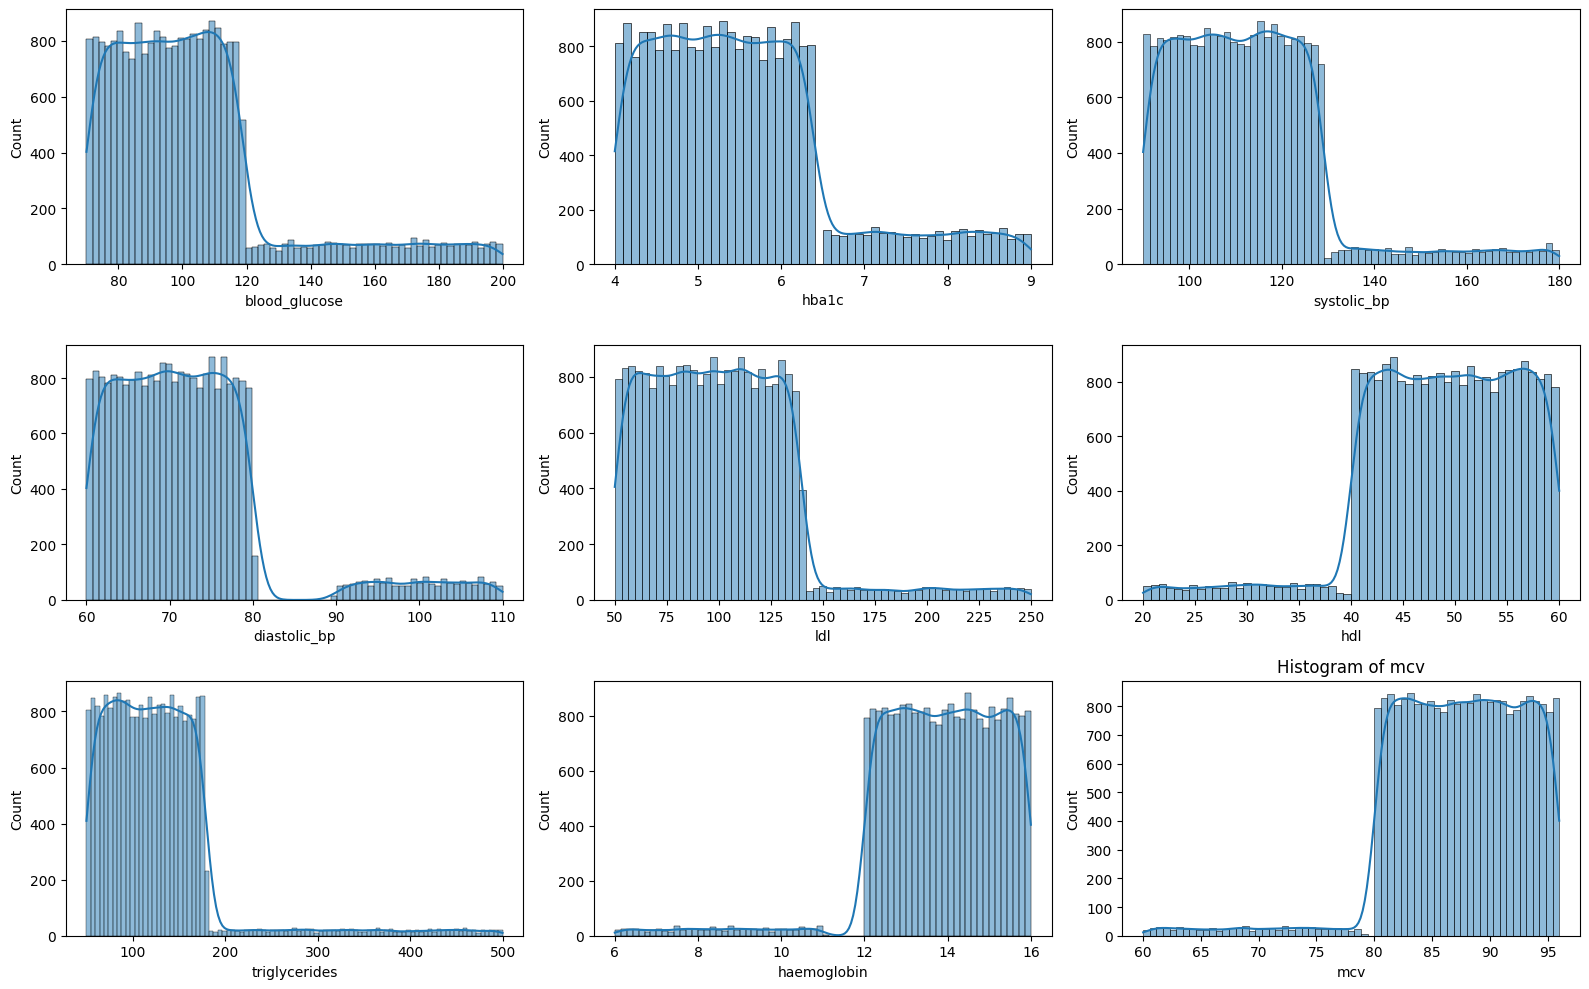

In [86]:
row, cols = 3 , 3
n = 9

fig , axes = plt.subplots(row,cols , figsize=(16 ,10))
axes = axes.flatten()
data_num = df.drop(['condition']  , axis =1)
for i , col in enumerate(data_num.columns) :
  sns.histplot(data_num[col] , kde = True , ax = axes[i])
  plt.title(f'Histogram of {col}')

# for j in range(n , row*cols) :
#   fig.delaxes(axes[j])

plt.tight_layout()

**Data Distribution Analysis (Histograms)**

The dataset includes 9 medical test results.  
Below is the interpretation of the histograms for each feature:

---

**1. Blood Glucose**
- Most values fall between **80 – 120** (normal range).  
- A tail extends up to ~200 → represents **diabetes cases**.  

---

**2. HbA1C**
- Majority are within **4.5 – 6** (normal).  
- A smaller portion above **6.5 – 9** → indicates **chronic diabetes**.  

---

**3. Systolic Blood Pressure**
- Most values are between **100 – 130** (normal to slightly elevated).  
- Values above **140 – 180** → correspond to **hypertension cases**.  

---

**4. Diastolic Blood Pressure**
- Concentrated between **60 – 80** (normal range).  
- Higher values **90 – 110** → signal **hypertension**.  

---

**5. LDL (Bad Cholesterol)**
- Majority between **80 – 130** (near normal).  
- Values above **150 – 250** → indicate **high cholesterol**.  

---

**6. HDL (Good Cholesterol)**
- Most values range **40 – 55** (healthy range).  
- Very few cases below **35** → risk for **heart disease**.  

---

**7. Triglycerides**
- Mostly between **80 – 150** (normal).  
- Outliers **200 – 500** → severe **hypertriglyceridemia**.  

---

**8. Haemoglobin**
- Majority fall within **12 – 15** (normal for adults).  
- Low values **< 11** → represent **anemia**.  

---

**9. MCV (Mean Corpuscular Volume)**
- Most patients fall within **80 – 95** (normal range).  
- Some cases below **75** → suggest **microcytic anemia**.  

---

**Summary**
- The majority of individuals in the dataset fall within **normal health ranges** (Fit).  
- Clear **outliers** exist at the tails of the distributions, which correspond to different conditions:  
  - **Diabetes** → High Glucose & HbA1C.  
  - **Hypertension** → High Systolic & Diastolic BP.  
  - **High Cholesterol** → Elevated LDL & Triglycerides.  
  - **Anemia** → Low Haemoglobin & MCV.  

This confirms that the dataset is **well-structured for classification tasks** across multiple diseases.


***↪ `That means you need a model that can handle outliers well.`***

---

## **➡Descriptive Statistics**

In [87]:
df.describe()

,blood_glucose,hba1c,systolic_bp,diastolic_bp,ldl,hdl,triglycerides,haemoglobin,mcv
count,23574.000000,23574.000000,23574.000000,23574.000000,23574.000000,23574.000000,23574.000000,23574.000000,23574.000000
mean,102.801087,5.513664,112.771517,72.137460,100.392235,48.871107,126.529092,13.809347,87.342286
std,26.716975,1.090884,16.440514,9.639635,34.885754,7.381829,66.142010,1.532609,5.752625
min,70.010000,4.000000,90.000000,60.000000,50.000000,20.050000,50.010000,6.000000,60.000000
25%,84.190000,4.680000,100.562500,65.420000,73.650000,44.050000,83.790000,12.890000,83.510000
50%,98.330000,5.360000,111.060000,70.760000,97.440000,49.390000,117.805000,13.930000,87.690000
75%,111.850000,6.060000,121.437500,76.100000,121.080000,54.750000,152.050000,14.960000,91.820000
max,199.950000,9.000000,179.990000,109.980000,250.000000,60.000000,499.800000,16.000000,96.000000


 - [triglycerides , ldl ] ➡ Have **Strong** Outlier
 - [blood_glucose	]       ➡ Have **Mediam** Outlier
 - [systolic_bp	]         ➡ Have **Low** Outlier

 ***↪ `That means we will shoud deal with outlier.`***

**➡Bivariate & Multivariate Analysis**

In [88]:
df.drop('condition' , axis = 1).corr()


,blood_glucose,hba1c,systolic_bp,diastolic_bp,ldl,hdl,triglycerides,haemoglobin,mcv
blood_glucose,1.000000,0.622310,-0.058344,-0.071828,-0.049629,0.052606,-0.058514,0.036309,0.031640
hba1c,0.622310,1.000000,-0.055271,-0.061276,-0.039636,0.043368,-0.052468,0.044506,0.034386
systolic_bp,-0.058344,-0.055271,1.000000,0.575616,-0.035759,0.030866,-0.040228,0.020086,0.018887
diastolic_bp,-0.071828,-0.061276,0.575616,1.000000,-0.038200,0.034082,-0.046888,0.021704,0.019394
ldl,-0.049629,-0.039636,-0.035759,-0.038200,1.000000,-0.406839,0.501081,0.016598,0.029323
hdl,0.052606,0.043368,0.030866,0.034082,-0.406839,1.000000,-0.484943,-0.020414,-0.011386
triglycerides,-0.058514,-0.052468,-0.040228,-0.046888,0.501081,-0.484943,1.000000,0.025364,0.026163
haemoglobin,0.036309,0.044506,0.020086,0.021704,0.016598,-0.020414,0.025364,1.000000,0.383464
mcv,0.031640,0.034386,0.018887,0.019394,0.029323,-0.011386,0.026163,0.383464,1.000000


In [89]:
df.sample(5)

,blood_glucose,hba1c,systolic_bp,diastolic_bp,ldl,hdl,triglycerides,haemoglobin,mcv,condition
14771,112.39,5.93,109.34,75.71,118.92,51.58,78.42,13.39,82.63,Fit
9707,97.73,5.91,179.99,93.86,76.09,45.92,141.73,14.04,86.33,Hypertension
10746,112.95,5.85,108.03,72.26,95.60,40.12,135.51,15.66,88.30,Fit
11823,112.33,4.07,107.15,70.22,104.63,45.52,105.14,13.94,90.99,Fit
12982,70.02,5.93,93.09,63.83,84.76,49.70,95.79,13.28,95.42,Fit




---



# **🚨Outliers**

In [90]:
df.describe()

,blood_glucose,hba1c,systolic_bp,diastolic_bp,ldl,hdl,triglycerides,haemoglobin,mcv
count,23574.000000,23574.000000,23574.000000,23574.000000,23574.000000,23574.000000,23574.000000,23574.000000,23574.000000
mean,102.801087,5.513664,112.771517,72.137460,100.392235,48.871107,126.529092,13.809347,87.342286
std,26.716975,1.090884,16.440514,9.639635,34.885754,7.381829,66.142010,1.532609,5.752625
min,70.010000,4.000000,90.000000,60.000000,50.000000,20.050000,50.010000,6.000000,60.000000
25%,84.190000,4.680000,100.562500,65.420000,73.650000,44.050000,83.790000,12.890000,83.510000
50%,98.330000,5.360000,111.060000,70.760000,97.440000,49.390000,117.805000,13.930000,87.690000
75%,111.850000,6.060000,121.437500,76.100000,121.080000,54.750000,152.050000,14.960000,91.820000
max,199.950000,9.000000,179.990000,109.980000,250.000000,60.000000,499.800000,16.000000,96.000000


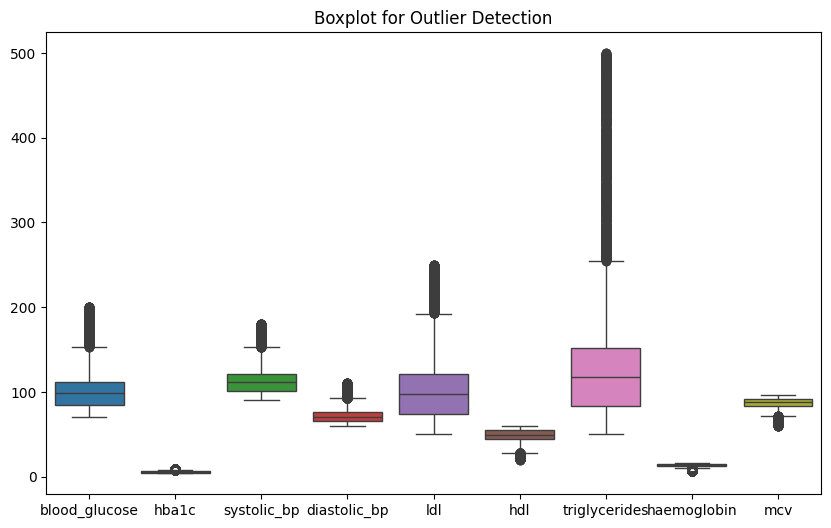

In [91]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot for Outlier Detection')
plt.show()

 - [triglycerides , ldl ] ➡ Have **Strong** Outlier
 - [blood_glucose	]       ➡ Have **Mediam** Outlier
 - [systolic_bp	]         ➡ Have **Low** Outlier


In [92]:
q1_tri = 83.790000
q3_tri = 152.050000
iqr_tri = q3_tri - q1_tri
Max_tri = q3_tri + 2.2*iqr_tri


q1_ldl = 73.650000
q3_ldl = 121.080000
iqr_ldl = q3_ldl - q1_ldl
Max_ldl = q3_ldl + 1.7*iqr_ldl


q1_blood = 84.190000
q3_blood = 111.850000
iqr_blood = q3_blood - q1_blood
Max_blood = q3_blood+ 2*iqr_blood

In [93]:
df = df[ (df.triglycerides <= Max_tri ) & (df.ldl <= Max_ldl ) & (df.blood_glucose <= Max_blood) ]

In [94]:
df.shape

(21324, 10)

In [95]:
df.head()

,blood_glucose,hba1c,systolic_bp,diastolic_bp,ldl,hdl,triglycerides,haemoglobin,mcv,condition
0,107.38,4.93,109.25,74.10,129.20,52.11,68.84,10.17,61.54,Anemia
1,108.65,5.43,92.61,62.02,51.18,44.06,78.82,12.29,91.04,Fit
2,103.95,6.08,122.95,63.01,107.72,52.08,139.58,15.93,81.75,Fit
3,87.33,4.79,91.16,75.81,109.39,46.83,108.29,15.18,85.51,Fit
4,114.42,4.10,122.86,76.11,123.89,52.92,123.22,15.33,92.30,Fit




---



# **🧩Feature Extraction**

In [96]:
def Feature_Extraction(df: pd.DataFrame) -> pd.DataFrame:
    """
    Takes a DataFrame with the following columns:
    ['Blood_glucose', 'HbA1C', 'Systolic_BP', 'Diastolic_BP',
     'LDL', 'HDL', 'Triglycerides', 'Haemoglobin', 'MCV']

    Returns the same DataFrame with additional engineered features:
    - glucose_hba1c_ratio
    - pulse_pressure, MAP, hypertension_flag
    - total_cholesterol, ldl_hdl_ratio, tg_hdl_ratio, non_hdl
    - anaemia_flag, microcytosis_flag, hb_mcv_ratio
    - risk_score
    """

    df = df.rename(columns=str.lower)


    df['glucose_hba1c_ratio'] = df['blood_glucose'] / df['hba1c']

    df['pulse_pressure'] = df['systolic_bp'] - df['diastolic_bp']
    df['MAP'] = (df['systolic_bp'] + 2*df['diastolic_bp']) / 3
    df['hypertension_flag'] = ((df['systolic_bp'] >= 140) |
                               (df['diastolic_bp'] >= 90)).astype(int)


    df['total_cholesterol'] = df['ldl'] + df['hdl'] + (df['triglycerides'] / 5)
    df['ldl_hdl_ratio'] = df['ldl'] / df['hdl']
    df['tg_hdl_ratio'] = df['triglycerides'] / df['hdl']
    df['non_hdl'] = df['total_cholesterol'] - df['hdl']
    df['anaemia_flag'] = (df['haemoglobin'] < 12).astype(int)
    df['microcytosis_flag'] = (df['mcv'] < 80).astype(int)
    df['hb_mcv_ratio'] = df['haemoglobin'] / df['mcv']


    df['risk_score'] = (
        (df['blood_glucose']/200) +
        (df['ldl']/160) +
        (df['triglycerides']/200) +
        (df['systolic_bp']/140)
    )

    return df

In [97]:
df = Feature_Extraction(df)

In [98]:
df.head()

,blood_glucose,hba1c,systolic_bp,diastolic_bp,ldl,hdl,triglycerides,haemoglobin,mcv,condition,glucose_hba1c_ratio,pulse_pressure,MAP,hypertension_flag,total_cholesterol,ldl_hdl_ratio,tg_hdl_ratio,non_hdl,anaemia_flag,microcytosis_flag,hb_mcv_ratio,risk_score
0,107.38,4.93,109.25,74.10,129.20,52.11,68.84,10.17,61.54,Anemia,21.780933,35.15,85.816667,0,195.078,2.479371,1.321052,142.968,1,1,0.165258,2.468957
1,108.65,5.43,92.61,62.02,51.18,44.06,78.82,12.29,91.04,Fit,20.009208,30.59,72.216667,0,111.004,1.161598,1.788924,66.944,0,0,0.134996,1.918725
2,103.95,6.08,122.95,63.01,107.72,52.08,139.58,15.93,81.75,Fit,17.097039,59.94,82.990000,0,187.716,2.068356,2.680108,135.636,0,0,0.194862,2.769114
3,87.33,4.79,91.16,75.81,109.39,46.83,108.29,15.18,85.51,Fit,18.231733,15.35,80.926667,0,177.878,2.335896,2.312407,131.048,0,0,0.177523,2.312930
4,114.42,4.10,122.86,76.11,123.89,52.92,123.22,15.33,92.30,Fit,27.907317,46.75,91.693333,0,201.454,2.341081,2.328420,148.534,0,0,0.166089,2.840084


---

# **⚙️Prepar data for model**

In [99]:
df.head()

,blood_glucose,hba1c,systolic_bp,diastolic_bp,ldl,hdl,triglycerides,haemoglobin,mcv,condition,glucose_hba1c_ratio,pulse_pressure,MAP,hypertension_flag,total_cholesterol,ldl_hdl_ratio,tg_hdl_ratio,non_hdl,anaemia_flag,microcytosis_flag,hb_mcv_ratio,risk_score
0,107.38,4.93,109.25,74.10,129.20,52.11,68.84,10.17,61.54,Anemia,21.780933,35.15,85.816667,0,195.078,2.479371,1.321052,142.968,1,1,0.165258,2.468957
1,108.65,5.43,92.61,62.02,51.18,44.06,78.82,12.29,91.04,Fit,20.009208,30.59,72.216667,0,111.004,1.161598,1.788924,66.944,0,0,0.134996,1.918725
2,103.95,6.08,122.95,63.01,107.72,52.08,139.58,15.93,81.75,Fit,17.097039,59.94,82.990000,0,187.716,2.068356,2.680108,135.636,0,0,0.194862,2.769114
3,87.33,4.79,91.16,75.81,109.39,46.83,108.29,15.18,85.51,Fit,18.231733,15.35,80.926667,0,177.878,2.335896,2.312407,131.048,0,0,0.177523,2.312930
4,114.42,4.10,122.86,76.11,123.89,52.92,123.22,15.33,92.30,Fit,27.907317,46.75,91.693333,0,201.454,2.341081,2.328420,148.534,0,0,0.166089,2.840084


## ***➡encoder***

In [100]:
df["condition"] = df["condition"].map({
    'Anemia': 0,
    'Fit': 1 ,
    'Hypertension':2,
    'Diabetes':3,
    'High_Cholesterol':4
})

In [101]:
features = df.drop('condition' , axis =  1)
target = df.condition

In [102]:
features.head()

,blood_glucose,hba1c,systolic_bp,diastolic_bp,ldl,hdl,triglycerides,haemoglobin,mcv,glucose_hba1c_ratio,pulse_pressure,MAP,hypertension_flag,total_cholesterol,ldl_hdl_ratio,tg_hdl_ratio,non_hdl,anaemia_flag,microcytosis_flag,hb_mcv_ratio,risk_score
0,107.38,4.93,109.25,74.10,129.20,52.11,68.84,10.17,61.54,21.780933,35.15,85.816667,0,195.078,2.479371,1.321052,142.968,1,1,0.165258,2.468957
1,108.65,5.43,92.61,62.02,51.18,44.06,78.82,12.29,91.04,20.009208,30.59,72.216667,0,111.004,1.161598,1.788924,66.944,0,0,0.134996,1.918725
2,103.95,6.08,122.95,63.01,107.72,52.08,139.58,15.93,81.75,17.097039,59.94,82.990000,0,187.716,2.068356,2.680108,135.636,0,0,0.194862,2.769114
3,87.33,4.79,91.16,75.81,109.39,46.83,108.29,15.18,85.51,18.231733,15.35,80.926667,0,177.878,2.335896,2.312407,131.048,0,0,0.177523,2.312930
4,114.42,4.10,122.86,76.11,123.89,52.92,123.22,15.33,92.30,27.907317,46.75,91.693333,0,201.454,2.341081,2.328420,148.534,0,0,0.166089,2.840084


In [103]:
target.unique()

array([0, 1, 2, 3, 4], dtype=int64)

## ***➡Scale***

In [104]:
from sklearn.preprocessing import RobustScaler

In [105]:
scaler = RobustScaler()

In [106]:
features_scaler = scaler.fit_transform(features)

In [107]:
features_scaler

array([[ 0.39384499, -0.28461538, -0.09590671, ...,  1.        ,
         0.29509335,  0.00693737],
       [ 0.44180119,  0.1       , -0.88791052, ...,  0.        ,
        -0.97802177, -1.33916544],
       [ 0.2643255 ,  0.6       ,  0.55616373, ...,  0.        ,
         1.5404959 ,  0.74124993],
       ...,
       [ 0.63098272, -0.3       ,  0.81508805, ...,  0.        ,
         0.45789474, -0.57567487],
       [ 0.06343812, -0.5       ,  2.98357925, ...,  0.        ,
         0.99498738,  0.60277779],
       [ 0.60379496, -0.28461538,  1.24535935, ...,  0.        ,
        -0.25575462,  0.40389637]])

In [108]:
target.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [109]:
df.head()

,blood_glucose,hba1c,systolic_bp,diastolic_bp,ldl,hdl,triglycerides,haemoglobin,mcv,condition,glucose_hba1c_ratio,pulse_pressure,MAP,hypertension_flag,total_cholesterol,ldl_hdl_ratio,tg_hdl_ratio,non_hdl,anaemia_flag,microcytosis_flag,hb_mcv_ratio,risk_score
0,107.38,4.93,109.25,74.10,129.20,52.11,68.84,10.17,61.54,0,21.780933,35.15,85.816667,0,195.078,2.479371,1.321052,142.968,1,1,0.165258,2.468957
1,108.65,5.43,92.61,62.02,51.18,44.06,78.82,12.29,91.04,1,20.009208,30.59,72.216667,0,111.004,1.161598,1.788924,66.944,0,0,0.134996,1.918725
2,103.95,6.08,122.95,63.01,107.72,52.08,139.58,15.93,81.75,1,17.097039,59.94,82.990000,0,187.716,2.068356,2.680108,135.636,0,0,0.194862,2.769114
3,87.33,4.79,91.16,75.81,109.39,46.83,108.29,15.18,85.51,1,18.231733,15.35,80.926667,0,177.878,2.335896,2.312407,131.048,0,0,0.177523,2.312930
4,114.42,4.10,122.86,76.11,123.89,52.92,123.22,15.33,92.30,1,27.907317,46.75,91.693333,0,201.454,2.341081,2.328420,148.534,0,0,0.166089,2.840084


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21324 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   blood_glucose        21324 non-null  float64
 1   hba1c                21324 non-null  float64
 2   systolic_bp          21324 non-null  float64
 3   diastolic_bp         21324 non-null  float64
 4   ldl                  21324 non-null  float64
 5   hdl                  21324 non-null  float64
 6   triglycerides        21324 non-null  float64
 7   haemoglobin          21324 non-null  float64
 8   mcv                  21324 non-null  float64
 9   condition            21324 non-null  int64  
 10  glucose_hba1c_ratio  21324 non-null  float64
 11  pulse_pressure       21324 non-null  float64
 12  MAP                  21324 non-null  float64
 13  hypertension_flag    21324 non-null  int32  
 14  total_cholesterol    21324 non-null  float64
 15  ldl_hdl_ratio        21324 non-null  floa

## ***➡PCA***

In [111]:
from sklearn.decomposition import PCA

In [112]:
pca=PCA(n_components=0.95)
features_pca=pca.fit_transform(features_scaler)
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.282322  , 0.2216337 , 0.09846996, 0.08061661, 0.07654291,
       0.07264627, 0.0622219 , 0.05257012, 0.0433639 ])

---

# **🤖model**

In [113]:
from sklearn.model_selection import train_test_split

## ***➡Split***

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(features_pca, target, test_size=0.25, random_state=42)

## **➡LogisticRegression**

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
Lmodel = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
Lmodel.fit(X_train, Y_train)
y_pred = Lmodel.predict(X_test)

In [117]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [118]:
print('Confusion Matrix for LogisticRegression : ')
print(confusion_matrix(Y_test, y_pred))
print('-------------------------------------------------')
print(accuracy_score(Y_test, y_pred))
print('-------------------------------------------------')
print(classification_report(Y_test, y_pred))

Confusion Matrix for LogisticRegression : 
[[ 206    0    0    0    0]
 [   0 4194    0    0    0]
 [   0    0  416    0    0]
 [   0    3    0  442    0]
 [   0    1    0    0   69]]
-------------------------------------------------
0.9992496717313825
-------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00      4194
           2       1.00      1.00      1.00       416
           3       1.00      0.99      1.00       445
           4       1.00      0.99      0.99        70

    accuracy                           1.00      5331
   macro avg       1.00      1.00      1.00      5331
weighted avg       1.00      1.00      1.00      5331



## ***➡SVM***

In [119]:
#SVM
from sklearn.svm import SVC

In [120]:
svm=SVC(kernel='poly', C=1.0, random_state=42)

In [121]:
svm.fit(X_train, Y_train)
y_pred=svm.predict(X_test)

In [122]:
cm = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)

In [123]:
print("Confusion Matrix:\n", cm)
print('-------------------------------------------------')
print("Accuracy:", accuracy)
print('-------------------------------------------------')
print(classification_report(Y_test, y_pred))

Confusion Matrix:
 [[ 206    0    0    0    0]
 [   0 4194    0    0    0]
 [   0    0  416    0    0]
 [   0   13    0  432    0]
 [   0    1    0    0   69]]
-------------------------------------------------
Accuracy: 0.9973738510598387
-------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00      4194
           2       1.00      1.00      1.00       416
           3       1.00      0.97      0.99       445
           4       1.00      0.99      0.99        70

    accuracy                           1.00      5331
   macro avg       1.00      0.99      1.00      5331
weighted avg       1.00      1.00      1.00      5331



 ## **🌴Decision Tree**

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(features_scaler, target, test_size=0.25, random_state=42)

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [126]:
scores=[]
for depth in [1,2,3,4,5,6]:
  for s in [3,4,5,6,7]:
    TModel=DecisionTreeClassifier(max_depth=depth,min_samples_leaf=s)
    TModel.fit(X_train,Y_train)
    Acc=accuracy_score(Y_test,TModel.predict(X_test))
    scores.append((depth,s,Acc))
print(scores)

[(1, 3, 0.864753329581692), (1, 4, 0.864753329581692), (1, 5, 0.864753329581692), (1, 6, 0.864753329581692), (1, 7, 0.864753329581692), (2, 3, 0.9482273494653911), (2, 4, 0.9482273494653911), (2, 5, 0.9482273494653911), (2, 6, 0.9482273494653911), (2, 7, 0.9482273494653911), (3, 3, 0.9868692552991934), (3, 4, 0.9868692552991934), (3, 5, 0.9868692552991934), (3, 6, 0.9868692552991934), (3, 7, 0.9868692552991934), (4, 3, 1.0), (4, 4, 1.0), (4, 5, 0.9998124179328456), (4, 6, 1.0), (4, 7, 1.0), (5, 3, 0.9998124179328456), (5, 4, 1.0), (5, 5, 1.0), (5, 6, 1.0), (5, 7, 1.0), (6, 3, 1.0), (6, 4, 1.0), (6, 5, 0.9998124179328456), (6, 6, 1.0), (6, 7, 1.0)]


In [127]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=6,splitter='best')

In [128]:
dt_model.fit(X_train, Y_train)
y_pred_dt = dt_model.predict(X_test)

In [129]:
print('Confusion Matrix for GaussianNB : ')
print(confusion_matrix(Y_test, y_pred_dt))
print('-------------------------------------------------')
print('accuracy_score for GaussianNB : ',accuracy_score(Y_test, y_pred_dt))
print('-------------------------------------------------')
print(classification_report(Y_test, y_pred_dt))

Confusion Matrix for GaussianNB : 
[[ 206    0    0    0    0]
 [   0 4194    0    0    0]
 [   0    0  416    0    0]
 [   0    0    0  445    0]
 [   0    0    0    0   70]]
-------------------------------------------------
accuracy_score for GaussianNB :  1.0
-------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00      4194
           2       1.00      1.00      1.00       416
           3       1.00      1.00      1.00       445
           4       1.00      1.00      1.00        70

    accuracy                           1.00      5331
   macro avg       1.00      1.00      1.00      5331
weighted avg       1.00      1.00      1.00      5331



## ***📊 Naive Bayes***

In [130]:
from sklearn.naive_bayes import GaussianNB

In [131]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
y_pred_nb = nb_model.predict(X_test)

In [132]:
print('Confusion Matrix for GaussianNB : ')
print(confusion_matrix(Y_test, y_pred_nb))
print('-------------------------------------------------')
print('accuracy_score for GaussianNB : ',accuracy_score(Y_test, y_pred_nb))
print('-------------------------------------------------')
print(classification_report(Y_test, y_pred_nb))

Confusion Matrix for GaussianNB : 
[[ 206    0    0    0    0]
 [   0 4194    0    0    0]
 [   0    0  416    0    0]
 [   0    5    0  440    0]
 [   0    0    0    0   70]]
-------------------------------------------------
accuracy_score for GaussianNB :  0.999062089664228
-------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00      4194
           2       1.00      1.00      1.00       416
           3       1.00      0.99      0.99       445
           4       1.00      1.00      1.00        70

    accuracy                           1.00      5331
   macro avg       1.00      1.00      1.00      5331
weighted avg       1.00      1.00      1.00      5331



## ***➡Hard Voting***

In [133]:
from sklearn.ensemble import VotingClassifier

In [134]:
voting_clf = VotingClassifier(
    estimators=[('lr', Lmodel), ('dt', dt_model), ('nb', nb_model)],
    voting='hard',
)

In [135]:
voting_clf.fit(X_train, Y_train)
y_pred_vc = voting_clf.predict(X_test)

In [136]:
print('Confusion Matrix for GaussianNB : ')
print(confusion_matrix(Y_test, y_pred_vc))
print('-------------------------------------------------')
print('accuracy_score for GaussianNB : ',accuracy_score(Y_test, y_pred_vc))
print('-------------------------------------------------')
print(classification_report(Y_test, y_pred_vc))

Confusion Matrix for GaussianNB : 
[[ 206    0    0    0    0]
 [   0 4194    0    0    0]
 [   0    0  416    0    0]
 [   0    2    0  443    0]
 [   0    1    0    0   69]]
-------------------------------------------------
accuracy_score for GaussianNB :  0.9994372537985369
-------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00      4194
           2       1.00      1.00      1.00       416
           3       1.00      1.00      1.00       445
           4       1.00      0.99      0.99        70

    accuracy                           1.00      5331
   macro avg       1.00      1.00      1.00      5331
weighted avg       1.00      1.00      1.00      5331



## ***➡Soft Voting***

In [137]:
from sklearn.ensemble import VotingClassifier

In [138]:
voting_clf_soft = VotingClassifier(
    estimators=[('lr', Lmodel), ('dt', dt_model), ('nb', nb_model)],
    voting='soft',
)

In [139]:
voting_clf_soft.fit(X_train, Y_train)
y_pred_vc_soft = voting_clf_soft.predict(X_test)

In [140]:
#soft voting
print('Confusion Matrix for GaussianNB : ')
print(confusion_matrix(Y_test, y_pred_vc_soft))
print('-------------------------------------------------')
print('accuracy_score for GaussianNB : ',accuracy_score(Y_test, y_pred_vc_soft))
print('-------------------------------------------------')
print(classification_report(Y_test, y_pred_vc_soft))

Confusion Matrix for GaussianNB : 
[[ 206    0    0    0    0]
 [   0 4194    0    0    0]
 [   0    0  416    0    0]
 [   0    1    0  444    0]
 [   0    0    0    0   70]]
-------------------------------------------------
accuracy_score for GaussianNB :  0.9998124179328456
-------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00      4194
           2       1.00      1.00      1.00       416
           3       1.00      1.00      1.00       445
           4       1.00      1.00      1.00        70

    accuracy                           1.00      5331
   macro avg       1.00      1.00      1.00      5331
weighted avg       1.00      1.00      1.00      5331



## ***📶APIs***

In [141]:
import joblib
# joblib.dump(Lmodel, 'Logistic_health_model.pkl')

In [142]:
# joblib.dump(dt_model, 'Tree_health_model.pkl')

In [143]:
# joblib.dump(nb_model, 'Logistic_health_model.pkl')

In [144]:
joblib.dump(voting_clf, 'Voting_health_model.pkl')

['Voting_health_model.pkl']

---

# **👥About Us**

**Mohamed Sameh** =>  computer and information science Ain Shams University

**linkedin** ⇒ https://www.linkedin.com/in/mohamed-sameh-a4a61b232/

**WhatsAPP** ⇒ 01285452940